In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit
from scipy.stats import linregress

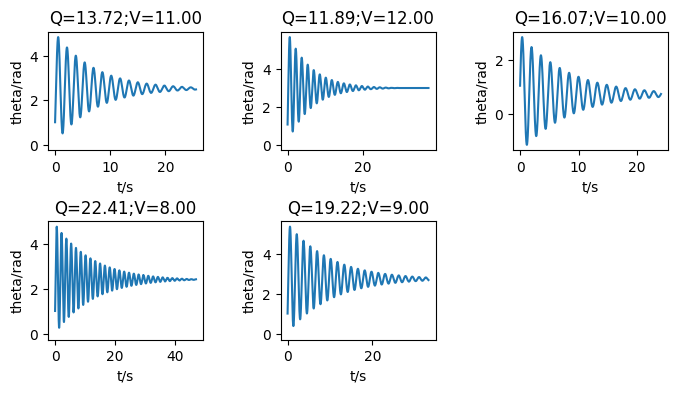

In [2]:
df = []
Q = [22.41,19.22,16.07,13.72,11.89]
V = [8,9,10,11,12]
fig = plt.figure(figsize=(8, 4))
gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1],wspace=0.5,hspace=0.6)

for i in range(1,6):
    df.append(pd.read_csv(f'./original/1-{i}.csv'))
    data = df[i-1]
    data = data.rename(columns=data.iloc[0]).drop(data.index[0])
    t = data['时间 (秒 s)']
    theta = data['角 (弧度 rad)']
    t = t.astype(float)
    theta = theta.astype(float)
    ax = fig.add_subplot(gs[1-i//3,(i%3)-1])
    q = Q[i-1]
    v = V[i-1]
    ax.set_title(f'Q={q:.2f};V={v:.2f}')
    plt.xlabel('t/s')
    plt.ylabel('theta/rad')
    plt.plot(t,theta)
plt.show()

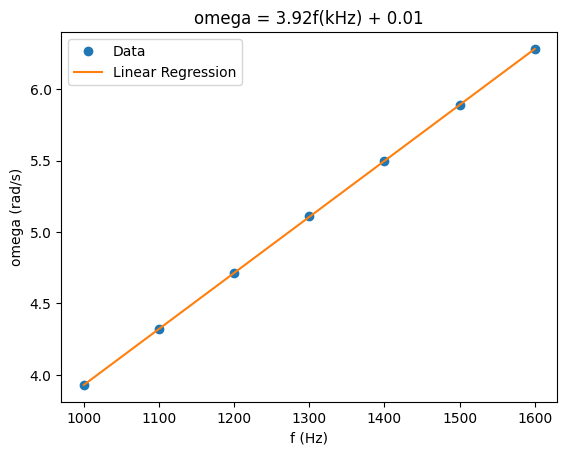

omega = 3.92f(kHz) + 0.01, r = 0.99999502


In [3]:
data = pd.read_excel('data.xlsx',sheet_name='2')
f = data['f(Hz)'].dropna()
omega = data['omega(rad/s)'].dropna()
slope, intercept, r_value, p_value, std_err = linregress(f,omega)
predicted_omega = slope * f + intercept
plt.plot(f, omega, 'o', label='Data')
plt.plot(f, predicted_omega, label='Linear Regression')
plt.xlabel('f (Hz)')
plt.ylabel('omega (rad/s)')
slope = 1000*slope
plt.title(f'omega = {slope:.2f}f(kHz) + {intercept:.2f}')
plt.legend()
plt.show()
print(f'omega = {slope:.2f}f(kHz) + {intercept:.2f}, r = {r_value:.8f}')

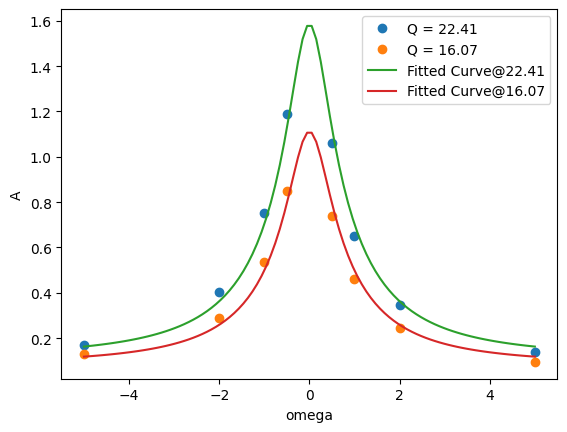

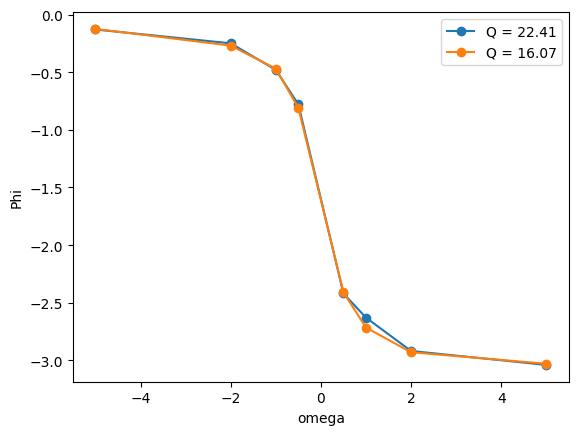

In [9]:
data1 = pd.read_excel('data.xlsx',sheet_name='3A')
data2 = pd.read_excel('data.xlsx',sheet_name='3P')


Q = [22.41,16.07]
omega = data1['omega']
A = [data1['A1'],data1['A2']]
phi = [data2['phi1'],data2['phi2']]
omega_range = np.linspace(min(omega), max(omega), 100)


def g(omega,Q,A,B):
    return A/(np.sqrt(omega**2+Q**2*(omega**2-1)**2))+B

def psi(omega,Q,p):
    return  -np.arctan(Q * (omega / (1 - omega**2)))+p


plt.plot(omega,A[0],'o',label='Q = 22.41')
plt.plot(omega,A[1],'o',label='Q = 16.07')
popt0, pcov0 = curve_fit(g, omega, A[0])
popt1, pcov1 = curve_fit(g, omega, A[1])
A_fit0 = g(omega_range, *popt0)
A_fit1 = g(omega_range, *popt1)
# Plot the fitted curve
plt.plot(omega_range, A_fit0, label='Fitted Curve@22.41')
plt.plot(omega_range, A_fit1, label='Fitted Curve@16.07')
plt.xlabel('omega')
plt.ylabel('A')
plt.legend()
plt.show()


plt.plot(omega,phi[0],'-o',label='Q = 22.41')
plt.plot(omega,phi[1],'-o',label='Q = 16.07')

plt.xlabel('omega')
plt.ylabel('Phi')
plt.legend()
plt.show()


In [ ]:
popt01, pcov01 = curve_fit(psi, omega, phi[0])
popt11, pcov11 = curve_fit(psi, omega, phi[1])
psi_fit0 = psi(omega_range, *popt01)
psi_fit1 = psi(omega_range, *popt11)
# Plot the fitted curve
plt.plot(omega_range, psi_fit0, label='Fitted Curve@Q=22.41')
plt.plot(omega_range, psi_fit1, label='Fitted Curve@Q=16.07')